In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generamos datos para practicar

Vamos a armar datos falsos que tengan una periodicidad para practicar un poco

$datos (dias) = cos(2\pi \frac{1}{7} dias) + cos(2\pi \frac{4}{365} dias) + 0.0001(dias - 200)^2 + 10 + ruido $ 

Noten que hay 5 terminos sumando, dos variaciones periodicas (que da el coseno), una variacion cuadratica lenta, un termino constante y ruido aleatorio

In [3]:
# Generamos un rango de fechas entre 1 de enero y 31 de diciembre
fechas = pd.date_range(start='2000-01-01', end='2000-12-31') 

In [5]:
# Como las funciones matematicas trabajan con numeros y no con fechas lo convertimos a dia del año
days = fechas.dayofyear

In [6]:
# Sumamos los terminos:
y = (np.cos(days / 7 * 2 * np.pi)  
     + np.sin(days / 365 * 4 * 2 * np.pi) 
     - 0.0001 * (days-200) ** 2  
     + 0.8 * np.random.randn(len(fechas))
     + 10
    )
# Creamos una serie de pandas que tenga esos datos en funcion de las fechas "fechas"
serie = pd.Series(index=fechas, data=y)

# Ejercicios

## Ej 1

Grafiquen la serie en funcion del tiempo

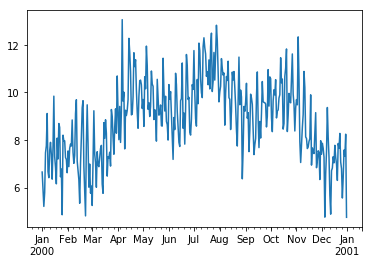

In [7]:
serie.plot()

## Ej 2

Grafiquen cada uno de los terminos por separado


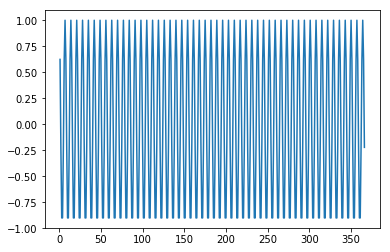

In [8]:
y = np.cos(days / 7 * 2 * np.pi)
plt.plot(days, y)


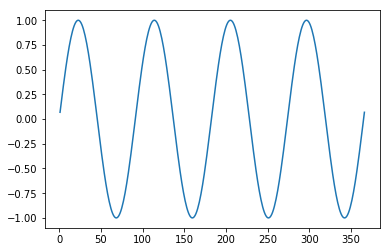

In [9]:
y = np.sin(days / 365 * 4 * 2 * np.pi) 
plt.plot(days,y)

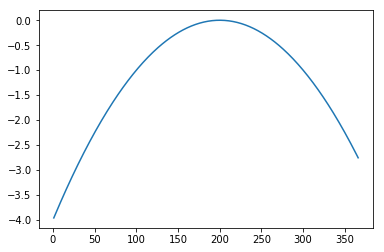

In [10]:
y = -0.0001 * (days-200) ** 2  
plt.plot(days,y)

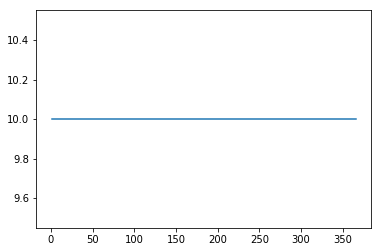

In [11]:
y = [10]*len(days)
plt.plot(days,y)

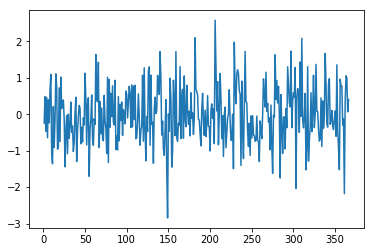

In [12]:
y = 0.8 * np.random.randn(len(fechas))
plt.plot(days,y)

## Ej 3

¿Que evolucion en el tiempo observan? Grafiquen la tendencia global general de los datos

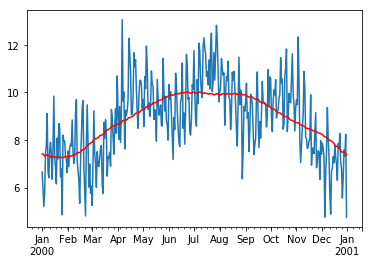

In [13]:
ax = serie.plot()
tendencia = serie.rolling(100, min_periods=1, center=True).mean()
tendencia.plot(color='r')

## Ej 4
Quiten la tendencia global de los datos ¿Que niveles de periodicidad observan? 

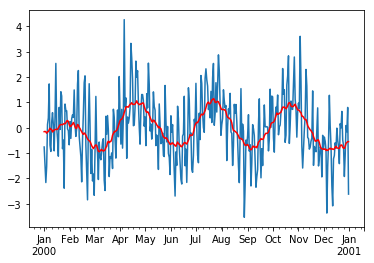

In [14]:
sin_tendencia = serie - tendencia
ax = sin_tendencia.plot()
tendencia2 = sin_tendencia.rolling(30, min_periods=1, center=True).mean()
tendencia2.plot(ax=ax, color='r')

## Ej 5

Quiten tambien esa componente periodica de los datos ¿Observan algun otro comportamientio periodico?

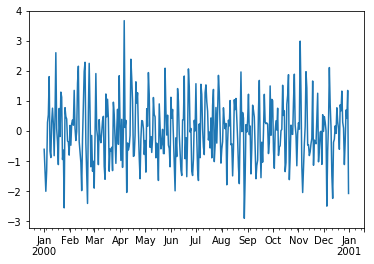

In [15]:
sin_tendencia2 = sin_tendencia - tendencia2 
sin_tendencia2.plot()

## Ej 6
Hagan un grafico del promedio de la serie para cada dia de la semana

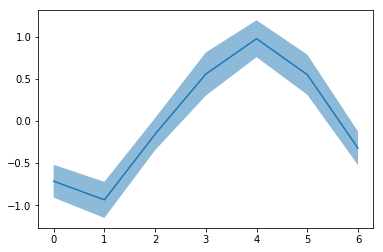

In [16]:
prom = sin_tendencia2.groupby(sin_tendencia2.index.dayofweek).mean()
sem = sin_tendencia2.groupby(sin_tendencia2.index.dayofweek).sem()
plt.plot(prom)

plt.fill_between(prom.index, prom - 2*sem, prom + 2*sem, alpha=0.5)


# Ahora si a trabajar solos con sus datos

Creen un notebook nuevo y trabajen ahi